In [1]:
# confidence interval

In [4]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
sns.set(rc={'figure.figsize':(13, 7.5)})

In [7]:
np.random.seed(42)

normal_distribution_male_mass_pound = np.random.normal(loc=181, scale=24, size=6000)

In [11]:
normal_distribution_female_mass_pound = np.random.normal(loc=181, scale=24, size=6500)

In [12]:
all_mass_value = np.concatenate((normal_distribution_female_mass_pound, normal_distribution_male_mass_pound), axis=0)

In [13]:
df_ppl_mass = pd.DataFrame(data={'mass_pounds': all_mass_value})

In [14]:
df_ppl_mass

,mass_pounds
0,193.257653
1,156.569213
2,162.796866
3,157.494022
4,177.675975
...,...
12995,167.975275
12996,203.062266
12997,198.900556
12998,176.569336


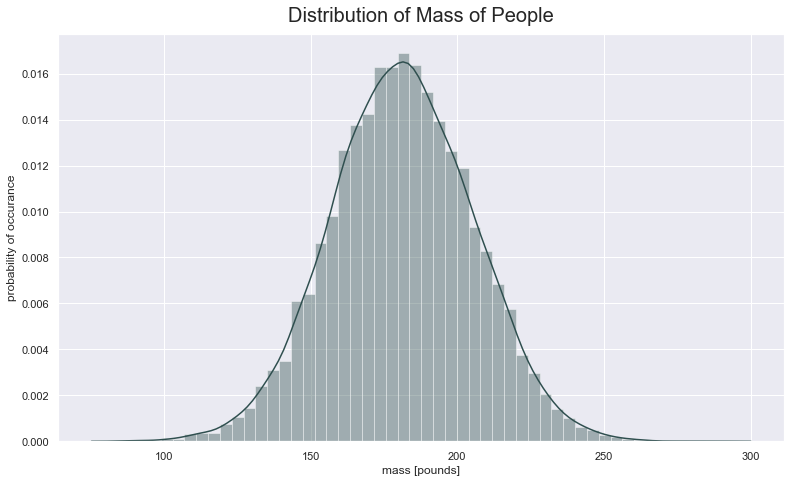

In [19]:
sns.distplot(df_ppl_mass['mass_pounds'], color='darkslategrey')
plt.xlabel('mass [pounds]')
plt.ylabel('probability of occurance')
plt.title('Distribution of Mass of People', y=1.015, fontsize=20)

plt.show()

In [23]:
# calculate population mean

pop_mean_mass = df_ppl_mass['mass_pounds'].mean()
pop_mean_mass

181.18614781923557

In [24]:
# calculate population standard deviation

pop_std_dev_mass = df_ppl_mass['mass_pounds'].std()
pop_std_dev_mass

24.091691649523533

In [26]:
# Sample 25 Orang

sample_means = []
n= 25

for sample in range(0,300):
    # random sampling
    sample_values = np.random.choice(a=df_ppl_mass['mass_pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

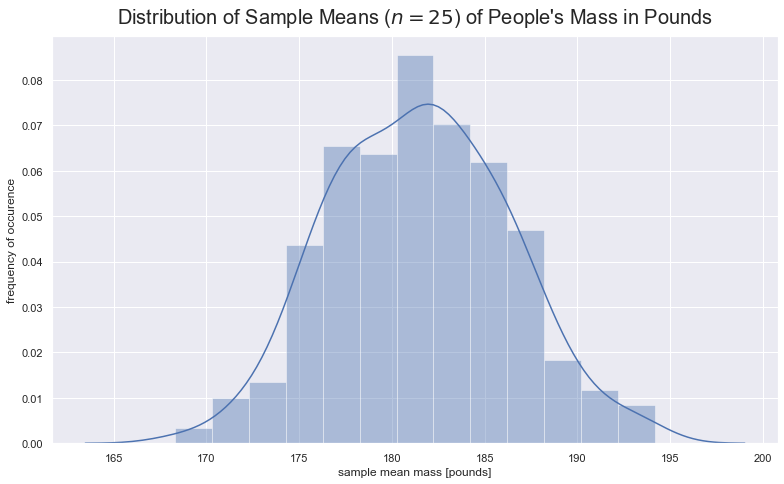

In [28]:
sns.distplot(sample_means)
plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurence')

plt.show()

In [29]:
# calculate sample means

mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

181.48358878636392

In [30]:
# calculate Std Dev of sample means

std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

4.773752936252148

In [32]:
# calculate std error

standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

4.818338329904707

In [37]:
gyn_sample_mean =163

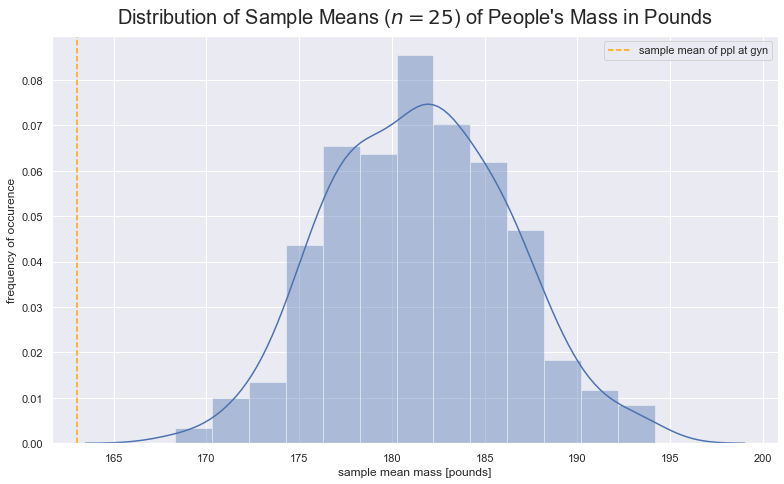

In [38]:
# visualize gym sample means to sampling distribution

sns.distplot(sample_means)
plt.axvline(x= gyn_sample_mean, linestyle='--', label="sample mean of ppl at gyn", c='orange')
plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurence')
plt.legend()
plt.show()

In [39]:
lower_CI = mean_of_sample_means - 1.96*standard_error

In [41]:
upper_CI = mean_of_sample_means + 1.96*standard_error

print(lower_CI)
print(upper_CI)

172.0396456597507
190.92753191297714


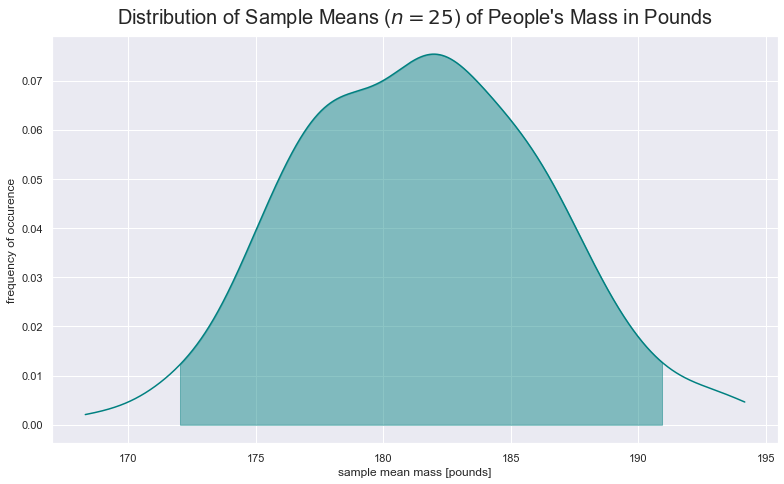

In [44]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_CI, upper_CI, 300)
plt.fill_between(shade, kde(shade),alpha=0.45,color='teal')

plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurence')

plt.show()

In [45]:
# probability distribution

In [46]:
# uniform

In [47]:
from scipy.stats import uniform

In [49]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

<function matplotlib.pyplot.show(*args, **kw)>

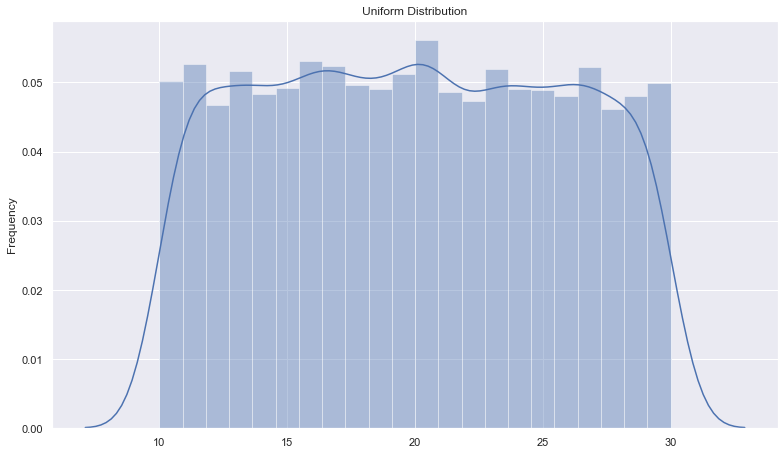

In [50]:
sns.distplot(data_uniform)
plt.title('Uniform Distribution')
plt.ylabel('Frequency')
plt.show

In [51]:
#bernoulli
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=1000, p=0.6)

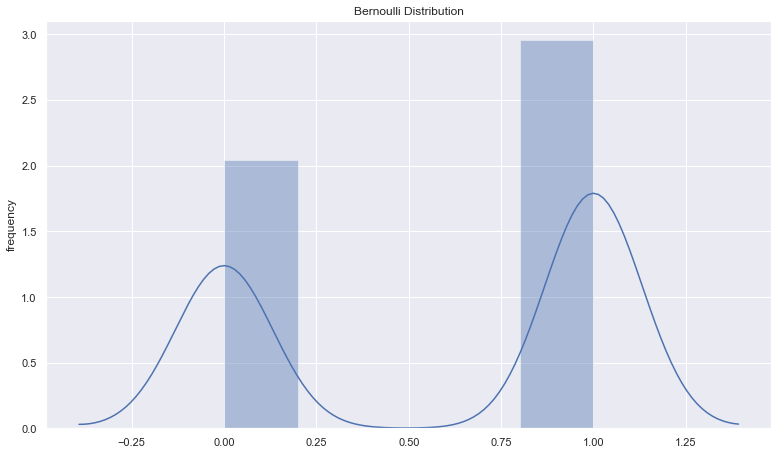

In [52]:
sns.distplot(data_bern)
plt.title('Bernoulli Distribution')
plt.ylabel('frequency')
plt.show()

In [54]:
#binomial
from scipy.stats import binom
data_binom = binom.rvs(n=10, p=0.8, size=10000)

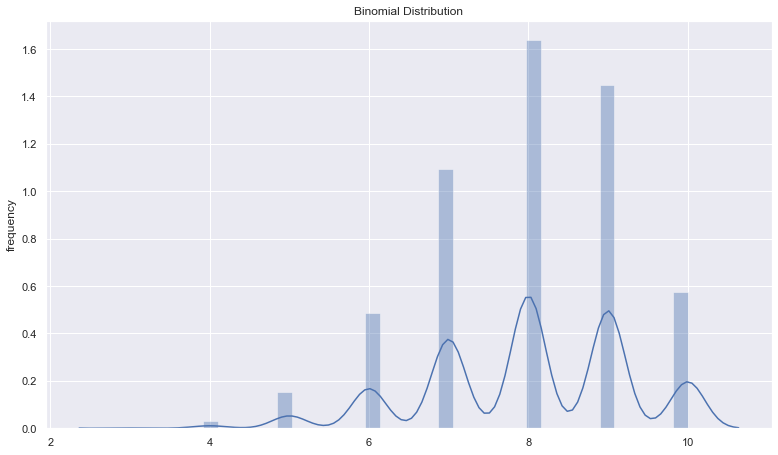

In [56]:
sns.distplot(data_binom)
plt.title('Binomial Distribution')
plt.ylabel('frequency')
plt.show()

In [57]:
# poisson
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

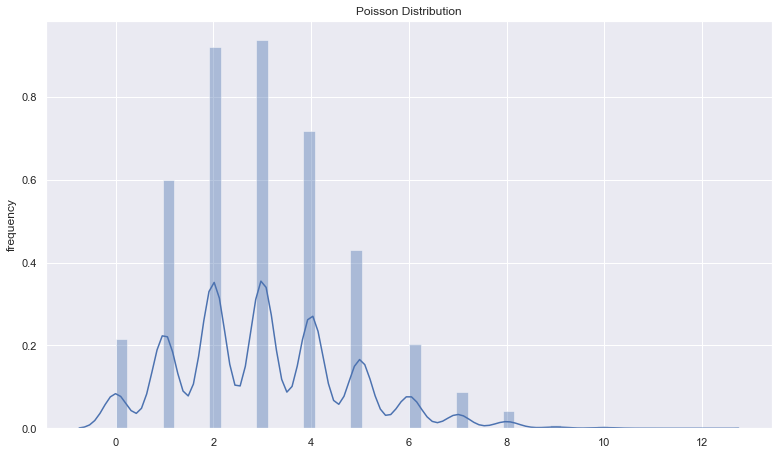

In [58]:
sns.distplot(data_poisson)
plt.title('Poisson Distribution')
plt.ylabel('frequency')
plt.show()

In [62]:
# Normal
from scipy.stats import norm
data_normal = norm.rvs(size=10000, loc=0, scale=1)

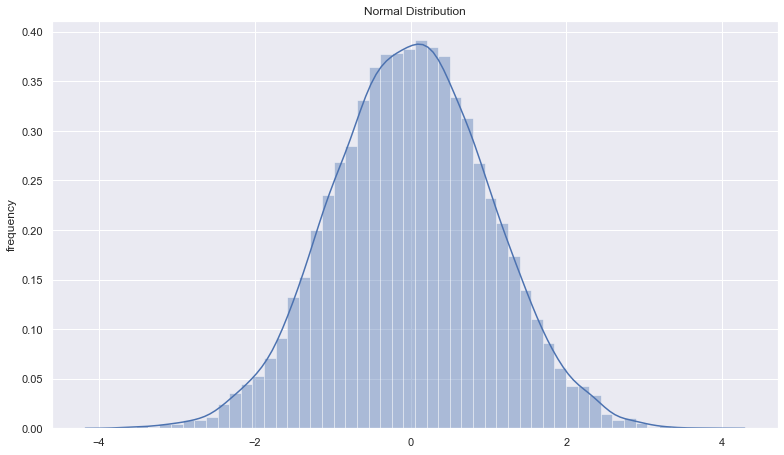

In [63]:
sns.distplot(data_normal)
plt.title('Normal Distribution')
plt.ylabel('frequency')
plt.show()

In [64]:
#Exponential
from scipy.stats import expon
data_expon = expon.rvs(scale=1, loc=0, size=1000)

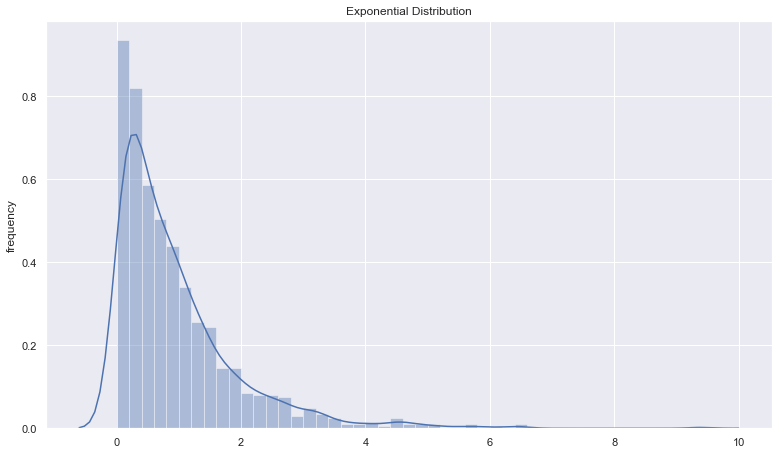

In [65]:
sns.distplot(data_expon)
plt.title('Exponential Distribution')
plt.ylabel('frequency')
plt.show()

In [72]:
# Hypothesis Testing

In [73]:
import statsmodels.api as sm

In [66]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [68]:
females = da[
    da['RIAGENDR'] == 2
]

male = da[
    da['RIAGENDR'] == 1
]

In [69]:
n1 = len(females)
mu1 = females['BMXBMI'].mean()
sd1 = females['BMXBMI'].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [71]:
n2 = len(male)
mu2 = male['BMXBMI'].mean()
sd2 = male['BMXBMI'].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [74]:
sm.stats.ztest(females['BMXBMI'].dropna(), male['BMXBMI'].dropna(), alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

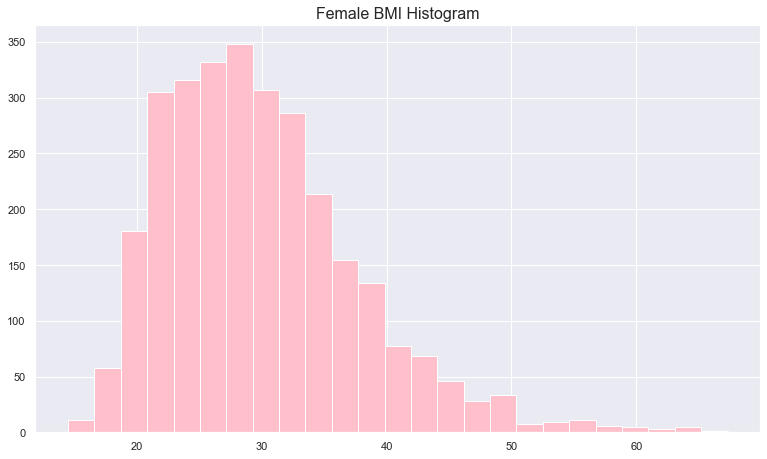

In [76]:
plt.title('Female BMI Histogram', fontsize=16)
plt.hist(females['BMXBMI'].dropna(), color='pink', bins=25)
plt.show()

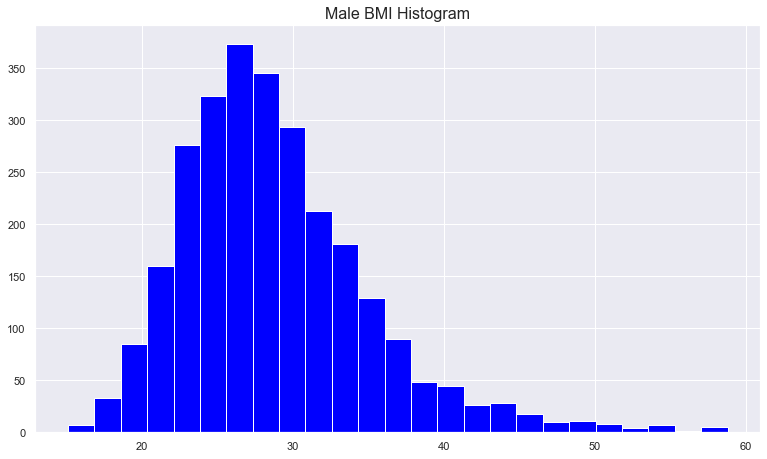

In [77]:
plt.title('Male BMI Histogram', fontsize=16)
plt.hist(male['BMXBMI'].dropna(), color='blue', bins=25)
plt.show()